# <center> La course à la rapidité<br/> Projet de la CesiCDP </center>

![logocesi](https://lyon.cesi.fr/wp-content/uploads/sites/30/2020/04/Sans-titre-2-02-500x224.png)

<div style="text-align:right">
    <strong> Développeurs </strong> : Jacob Antonin ; Larose Hugo ; Devrouete Corentin ; Genty Aurélien
</div>

<br/><br/>



## <center>I - Introduction </center>

<br/>
En cette ère du XXIème siècle, nous vivons dans une société ou le rendement est mis à rude épreuve. Dans notre société actuelle, être <strong> le plus rapide est devenu une contrainte auquel tout le monde est confronté </strong>.

De plus depuis les années 90, il y a eu une véritable prise de conscience mondiale de la nécessité de réduire la consommation d’énergie et des émissions de gaz à effet de serre. Les premiers engagements sont apparus lors de la signature du protocole de Kyoto en 1997. Mais son entrée en vigueur n’a finalement eu lieu qu’en 2005 et de nombreux scientifiques ont jugé les efforts insuffisants pour ralentir le réchauffement climatique. Depuis, d’autres engagements plus ambitieux ont vu le jour (division par 4 des émissions d’ici 2050 pour la France par exemple, engagements de certaines grandes villes comme Paris). Mais la tâche est compliquée. Les pouvoirs publics et les collectivités territoriales n’ont pas la possibilité d’obliger les entreprises et les particuliers à changer leurs habitudes pour atteindre ces objectifs. L’action se porte donc avant tout à faire évoluer les comportements. L’économie et le recyclage des matières premières, l’amélioration des modes de transports et des performances énergétiques des bâtiments doivent devenir des priorités.

Dans ce sens, <strong> L’ADEME </strong> (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires. 

Notre structure <strong> CesiCDP </strong> est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif. 

<strong> <em> Notre étude s’inscrit donc dans le cadre d’une réponse à l’appel de l’ADEME. </em> </strong>

<br/><br/>


### <center>1 - Contexte </center>

Le Problème de Tournées de Véhicules (VRP, Vehicle Routing Problem) est un des problèmes d’optimisation combinatoire les plus étudié. Il pose le problème suivant, visiter des clients à partir d’un dépôt et au moyen d’une flotte de véhicules, avec un coût minimal. De nombreuses variantes existent, dont certaines sont détaillées dans les sections suivantes. Historiquement, le VRP est une version étendue du Problème du Voyageur de Commerce (TSP, Traveling Salesman Problem), qui consiste à visiter l’ensemble des clients avec un seul véhicule.

<br/><br/>

<div style="color:red">
<strong>Notre projet sert donc à optimiser une tournée de livraison, de facon à obtenir une durée de transfert minimale entre son point de départ et d'arrivée, tout en gérant le traffic sur la route.</strong>
   </div>

<br/><br/>

 ## <center>II - Définition des variables de décision et de la fonction objectif </center>
 
 

### <center>1 - Variables de décision </center>

Tout d'abord, lors de ce projet il nous a fallu définir les variables de décision. 

Cette variable que nous avons défini : $x_i$  représentant la distance entre deux sommets (soit 2 villes)
est la seule variable utilisé ici.

<br/><br/>

### <center>2 - Fonction objectif </center>

Nous devons aussi définir la fonction objectif de ce problème, celle-ci étant d'obtenir le $Min$ de la somme des distances.
$$\sum_{i=1}^n x_i$$

<br/><br/>

### <center>3 - Implémentation de la matrice d'adjacence </center>

In [2]:
# @author : corentin
import random
import os
import string 
import json

#init de la liste contenant les villes
city = {}

# generation des villes une par une 
def generate_city(nb_ville_generer):

    for i in range (0,nb_ville_generer):

         city_name = generate_name(8)
         city_position = generate_position(nb_ville_generer)
         index = 'ville ' + str(i +1 ) 

         city[index] = {'nom_ville': city_name,  'position' : city_position}
         

    return city

#generation d'un nom de ville 
def generate_name(stringLenght):
    lettres = string.ascii_lowercase
    name = ''.join(random.choice(lettres) for i in range(stringLenght))
    return name 

#generation des position de la ville 
def generate_position(nb_ville_generer):
    start_rand = 0
    stop_rand = nb_ville_generer*4

    x = random.randrange(start_rand, stop_rand)
    y = random.randrange(start_rand, stop_rand)

    position = [x,y]
    
    return position



def createFile(filename, nb_ville_generer):   
    dump = generate_city(nb_ville_generer)
    filename_json = 'json_generate/' + filename + '.json' 
    # path_create = '/Livrable - 2/json_generate/'+ filename_json
    # with open(path_create, 'w', encoding='utf-8') as f: 
    #     json.dump(dump, f, ensure_ascii=False)

    f = open(filename_json, "w+")
    json.dump(dump, f, ensure_ascii=False)

    f.close()



print("---/ Bienvenue dans le générateur de ville \--- \n")
nb_ville_generer = int(input("Veuillez entrer le nombre de ville que vous voulez créer ... \n"))
filename = str(input("Veuillez entrer le nom de fichier que vous voulez créer ... \n"))
print("creation du fichier en cours . . . \n")
createFile(filename, nb_ville_generer)
print("Le fichier à bien été créé, à bientot...")

---/ Bienvenue dans le générateur de ville \--- 

Veuillez entrer le nombre de ville que vous voulez créer ... 
1
Veuillez entrer le nom de fichier que vous voulez créer ... 
test1
creation du fichier en cours . . . 

Le fichier à bien été créé, à bientot...


In [3]:
# @author : corentin
import json
import os
import math
from pprint import pprint

#init des villes
ville = None

nom_fichier = input("Veuillez mettre le nom du fichier json a importer\n") + ".json"

#import du JSON de la ville
path_fichier = os.path.join("json_generate",nom_fichier)
with open(path_fichier, "r") as f : 
    ville = json.load(f)


#fonction d'implémentation de la matrice d'adjacence
def create_matrice(ville):

    matrice_adjacence = []

    for ville_a in ville.items():
        element_matrice = []
        
        x_a =  ville_a[1]['position'][0]
        y_a = ville_a[1]['position'][1]
        nom_ville_a = str(ville_a[1]['nom_ville'])

        for ville_b in ville.items():
           x_b = ville_b[1]['position'][0]
           y_b = ville_b[1]['position'][1]
           nom_ville_b = str(ville_b[1]['nom_ville'])

           if nom_ville_a == nom_ville_b:
               element_matrice.append(0)

           else:
               element_matrice.append(math.sqrt(math.pow(x_b - x_a, 2) + math.pow(y_b - y_a, 2)))

        matrice_adjacence.append(element_matrice)
    return matrice_adjacence


pprint(create_matrice(ville))


Veuillez mettre le nom du fichier json a importer
test1
[[0]]


### <center>4 - Représentation d'un graphe via une matrice d'adjacence </center>

Veuillez mettre le nom du fichier json a importer
test1000


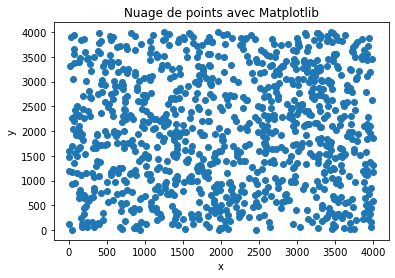

In [5]:
# @author : corentin, antonin
import matplotlib.pyplot as plt
import json
import os
import math
from pprint import pprint

ville = None

nom_fichier = input("Veuillez mettre le nom du fichier json a importer\n") + ".json"
#import du JSON de la ville
path_fichier = os.path.join("json_generate",nom_fichier)
with open(path_fichier, "r") as f : 
    ville = json.load(f)

coor_x = []
coor_y = []

def create_matrice(ville):

    matrice_adjacence = []

    for ville_a in ville.items():
        element_matrice = []
        
        x_a =  ville_a[1]['position'][0]
        coor_x.append(x_a)
        y_a = ville_a[1]['position'][1]
        coor_y.append(y_a)
        nom_ville_a = str(ville_a[1]['nom_ville'])

        for ville_b in ville.items():
           x_b = ville_b[1]['position'][0]
           y_b = ville_b[1]['position'][1]
           nom_ville_b = str(ville_b[1]['nom_ville'])

           if nom_ville_a == nom_ville_b:
               element_matrice.append(0)

           else:
               element_matrice.append(math.sqrt(math.pow(x_b - x_a, 2) + math.pow(y_b - y_a, 2)))

        matrice_adjacence.append(element_matrice)
    return matrice_adjacence


matrice = create_matrice(ville)


plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(coor_x, coor_y)
plt.show()

## <center>III - Modélisation du problème <center>

### <center>1 - Complexité théorique <center>

Le cas de la complexité du VRP s’approche de la complexité du voyageur de commerce.
Or cette dernière s’apparente à deux problèmes :
- <u>Le problème décisionnel :</u> peut-on effectuer un cycle remplissant les conditions de parcours ? (distance < k)
- <u>Le problème de recherche de solution :</u> renvoyer une solution de parcours spécifique

Le **VRP** quant à lui cherche à faire une **vérification d’un chemin optimisé parmi les solutions possibles** pour les différents parcours.
C’est une comparaison directe effectuable par une opération simple linéaire qui en elle-même ne complexifie pas la solution au-delà d’une approche polynomiale (simplement trouver le plus haut élément K parmi une liste de taille n, donc une complexité minimale associé au tri-simplifié).
Donc on peut apparenter la **complexité du VRP** à la classe de **complexité du problème du voyageur de commerce** tant que cette classe à une **complexité supérieur à P**.   

                                                                                                                      
La logique étant la suivante
O de VRP= $O(Voyageur\ de\ commerce) + O(tri\ simplifié)$  
O (tri simplifié) s’apparente à $O(n)$ (ou moins) dans $P$, si $O(VdC)$ est dans NP alors P est un sous-ensemble de NP, donc la complexité passe en NP (ensemble global).
                                                                                                              
![ouaisimage](https://lh3.googleusercontent.com/IRabtwtwye7lixV70oZFAQ4_O0ISK-0Hf3p-N16vXshfV3z9SZh_VO_572l7PPitVD00kYM=s102)

De même alors $O(tri simplifié) / O(VDC) -> 0$ en l’infini, donc $O(VRP)= O(tri simplifié)+ O(voyageur de commerce)~= O (VdC)$

<br/><br/>

Pour prouver la complexité du voyageur de commerce nous allons procéder de deux manières, **en premier par référence**, puis par une **vérification mathématique**.  
 
<u>Par référence :</u>

La complexité du voyageur de commerce est désigné comme NP-complet pour son problème décisionnelle, qui est de renvoyer un parcours.  
Il a été démontré tel quel par Richard Karp parmi les 21 problèmes NP-complets de Karp.  
Or la partie décisionnelle est la partie avec la plus faible complexité, car on cherche l’existence d’un parcours quelconque vérifiant VDC. 
***Ainsi notre borne inférieur (complexité minimale du problème) est au moins NP complet.***

Nous allons par une approche mathématique déterminer que le problème n’est pas $NEXP$, ce qui nous permettra de créer une borne supérieure. 
Nous allons également vérifier que le problème n’est pas P :

1)	La vérification et génération d’un cycle hamiltonien change d’exécution en exécution.
    
**Le problème n’est donc pas déterministe, ce qui est nécessaire pour être de complexité P**

2)	Pour vérifier si un problème est dans NP, on doit vérifier :
1. qu’il existe un certificat quantifiable et limité par les variables de décisions du problème
2. que l’on peut approcher la complexité de la résolution dans le pire des cas, par un polynôme

<u>Vérification du certificat (espace utilisé) :</u>
    
On remarque que le problème, pour une variable « nombre de villes » de taille n, renvoie une liste de villes de tailles n (notre parcours a une taille n), ainsi **notre certificat est bien réel et limité**. 

<u>Calcul de la solution</u>
    
- Via hiérarchisation 
    
Instant initial :
On a N villes possibles à choisir, soit n choix possibles à parcourir.
On a donc **N pour la complexité de l’instant initial**

- Instant K/étape K

    
A l’étape K, il nous reste N-k ville à parcourir (pour $N-K>1$). Or, on parcourt les N-k villes possible parmi le nombre de parcours précédent, après avoir voyagé vers la nouvelle ville, car on ne peut pas repasser par la même ville, **ce qui nous enlève 1 choix possible**. 
A l’étape $K+1$, on a $N-(k+1)$ choix possible parmi les parcours restants, ce qui prouve notre hiérarchisation.
**L’instant final est déterminé par la situation** où il ne reste plus qu’une ville à parcourir avant de revenir à la case départ.


- Opérations du programme

Donc le programme s’avère effectuer n opération à l’instant $T0$, puis $n-1$ à l’instant suivant, on se retrouve donc avec $n*(n-1)*…*(n-k)*(n-(k+1)*…*1*1$, soit $n!$, on a donc une complexité en $O(n!)$  pour le nombre de parcours effectués, tout cela en présumant que la complexité de prendre 1 parcours parmi 1 choix est $O(1)$, dans le cas contraire, si il y a une complexité supérieure tel que $O(m)$, **la complexité est dès lors $O(n!*m)$**, m étant déterminé par les complexités des contraintes, ici supposé polynomiales.  
Le problème peut également s’apparenter un polynôme de $n^n-k*n^(n-1)+…-j*n$
Soit un polynôme dont le degré maximal est n et qui peut s’écrire $N^n-(N-1)!$
Donc le critère numéro 2 est vérifié.
    <br/><br/>

<div style="color:red">
<strong> On a donc bien un programme donc la complexité maximale et minimale est NP complet, ainsi notre complexité est NP complet. </strong>
    </div>
<br/><br/>

## <center>IV - Modélisation algorithmique <center>
    


### <center> 1 - Définition de l'algorithme génétique </center>

Pour le choix de l'algorithme, nous avons décidé de prendre le génétique avec les paramètres suivant :

<u>Gène :</u> une ville ; <br/>
<u>Chromosome :</u> itinéraire satisfaisant ; <br/>
<u>Population :</u> ensemble d'itinéraire possible ; <br/>
<u>Parent :</u> 2 itinéraires combinés ;<br/>
<u>Pool d'accouplement :</u> collection de parent à reproduire ; <br/>
<u>Fitness :</u> fonction qui indique la qualité de l'itinéraire ; <br/>
<u>Mutation :</u> variation de gène dans la population ; <br/>
<u>Elitisme :</u> moyen de transporter un individu dans la prochaine génération. <br/><br/>

Et poursuivant les étapes ci-dessous :<br/>

    1- créer une population
    2- Déterminer une aptitude (fitness)
    3- Sélectionner un pool d'accouplement
    4- Accoupler
    5- Muter (en fonction des cas)
    6- répéter jusqu'à la solution globale
<br/>

<u>Pourquoi choisir l'algorithme génétique ?</u>

Tout d'abord l'algorithme génétique est un algortihme évolutionnistes, l'idée est de faire évoluer un ensemble de solutions à un problème donné, dans l'optique de trouver les meilleurs résultats. Ce qui est notre cas ici.

Afin de permettre la résolution du problème, l'algorithme génétique se base sur la théorie de Friedlin et Wentzell des perturbations stochastiques des systèmes dynamiques. La démonstration de Cerf montre d'ailleurs que le processus de convergence dépend essentiellement de la mutation.

De manière globale, on commence avec une population de base qui se compose le plus souvent de chaînes de caractères correspondant chacune à un chromosome.

Le contenu de cette population initiale est généré aléatoirement. On attribue à chacune des solutions une note qui correspond à son adaptation au problème. Ensuite, on effectue une sélection au sein de cette population.


Ensuite dans notre problème, la méthode de mutation ne devrait être capable de mélanger l'itinéraire, elle ne devrait jamais ajouter ou supprimer un emplacement de l'itinéraire, sinon elle risquerait de créer une solution invalide.

Enfin, les performances des algorithmes génétiques par rapport aux algorithmes classiques sont plus marquées lorsque les espaces de recherches sont importants, puis lorsque l'on préfère avoir une solution relativement bonne rapidement plutôt qu'avoir la solution optimale en une durée indéfinie. C'est ainsi que les algorithmes génétiques sont utilisés.


### <center> 2 - Code python de l'algorithme génétique </center>



In [4]:
def grade_population(population):
    """ Grade de la population. Retourne une liste de tuple (individu, fitness) trié par ordre décroissant de grade. """
    individus_grades = []
    for individu in population:
        individus_grades.append((individu, (individu.routeFitness)))
    return sorted(individus_grades, key=lambda x: x[1], reverse=True)

### <center> 3 - Contrainte rencontrée </center>

Nous possèdons un nombre de camions simultanément pour effectuer les livraisons. Le calcul de la tournée inclue l’affectation des objets aux différents camions disponibles, et nous oblige à minimiser le temps total, à la date de retour du dernier camion à la base.
- Capacité des camions (2 ou 3 dimensions) et encombrement des objets



## <center>V - Etude statistique <center>